# Decoding Speed

In [1]:
# This cell is tagged `parameters` and will be override by `papermill`
json_filename: str = "speed-bb72.json"  # where to save the result, must be provided
code: str = "bb(n=72,k=12,d=6)"
noise: str = "depolarize(p=0.01)"

kwargs = dict(
    min_time = 60,
    min_shots = 50,
    min_init_time = 0.1,
    min_init_shots = 1,
)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# import psutil
# psutil.Process().nice(0)# if on *ux
# psutil.Process().nice(psutil.IDLE_PRIORITY_CLASS)# if on win

In [4]:
from qec_lego_bench.cli.decoding_speed import decoding_speed, DecodingSpeedResult
from qec_lego_bench.hpc.job_store import Job, JobStore
from qec_lego_bench.hpc.plotter.logical_error_rate_plotter import *

In [5]:
# cluster_node_limit
c_vec = list(range(51)) + [100 * (10 ** i) for i in range(5)]

def evaluation_function(c: int, verbose: bool = True) -> DecodingSpeedResult:
    if verbose:
        print(f"c: {c}")
    return decoding_speed(decoder=f"mwpf(c={c})", code=code, noise=noise, **kwargs, no_print=not verbose)

jobs = [MonteCarloJob(c=c) for c in c_vec]
# evaluation_function(min(c_vec))


decoding time: 1.826e-05s


DecodingSpeedResult(elapsed=66.42116174319199, shots=3637563)

Define the plot functionality

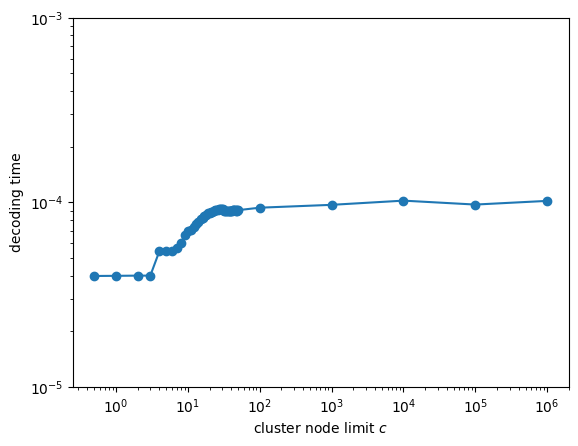

<Figure size 640x480 with 0 Axes>

In [6]:
@dataclass
class DecodingTimePlotter:
    hdisplay: display.DisplayHandle = field(
        default_factory=lambda: display.display("", display_id=True)
    )
    fig: Figure = field(default_factory=closed_figure)

    def __call__(self, executor: MonteCarloJobExecutor):
        display_c_of = lambda c: c if c != 0 else 0.5
        # plot the results
        fig = self.fig
        ax = fig.gca()
        ax.clear()
        ax.set_xlabel("cluster node limit $c$")
        ax.set_ylabel("decoding time")
        ax.set_xlim(display_c_of(min(c_vec)) / 2, display_c_of(max(c_vec))* 2)
        ax.set_xscale("log")
        ax.set_xscale("log")
        ax.set_ylim(1e-5, 1e-3)
        ax.set_yscale("log")
        x_vec = []
        y_vec = []
        for c in c_vec:
            job = executor.get_job(c=c)
            if job is None or job.result is None:
                continue
            x_vec.append(display_c_of(c))
            y_vec.append(job.result.decoding_time)
        ax.errorbar(x_vec, y_vec, fmt="o-")
        self.hdisplay.update(fig)

plotter = DecodingTimePlotter()

In [7]:
job_store = JobStore(evaluation_function, jobs, result_type=DecodingSpeedResult, filename=json_filename)
job_store.execute(loop_callback=plotter)

c: 0
Evaluating initialization of 64 shots, elapsed: 0.162583s, average: 2.540e-03s per shotEvaluating initialization of 32 shots, elapsed: 0.080487s, average: 2.515e-03s per shot
initialization time: 2.540e-03s
Evaluating decoding of 1663609 shots, elapsed: 66.446822s, average: 3.994e-05s per shot
decoding time: 3.994e-05s
c: 1
Evaluating initialization of 64 shots, elapsed: 0.167869s, average: 2.623e-03s per shot
initialization time: 2.623e-03s
Evaluating decoding of 1646145 shots, elapsed: 65.870131s, average: 4.001e-05s per shot
decoding time: 4.001e-05s
c: 2
Evaluating initialization of 64 shots, elapsed: 0.168133s, average: 2.627e-03s per shot
initialization time: 2.627e-03s
Evaluating decoding of 1571591 shots, elapsed: 63.048309s, average: 4.012e-05s per shot
decoding time: 4.012e-05s
c: 3
Evaluating initialization of 64 shots, elapsed: 0.169020s, average: 2.641e-03s per shot
initialization time: 2.641e-03s
Evaluating decoding of 1628576 shots, elapsed: 65.337995s, average: 4.0